studentname: Jingbo Cui<br />
studentID: 1717240<br />
Instruction to download the dataset: Download from Kaggle, the link is https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction.
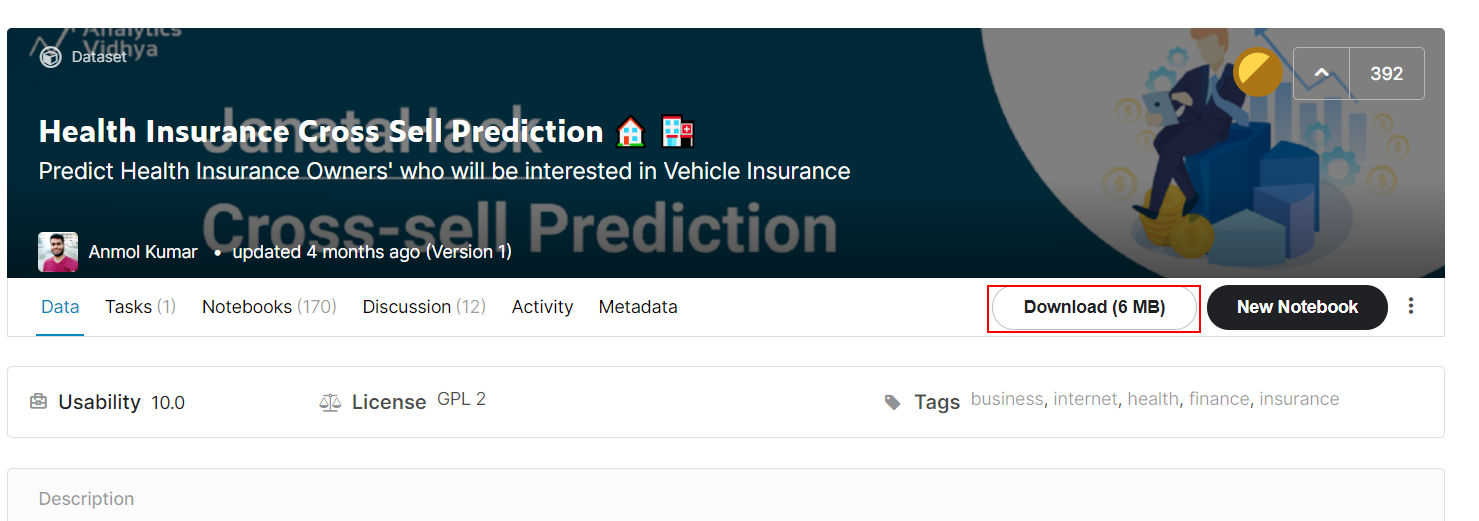
Click the Download button.<br />
All libraries I use can be simply import. 

# 1.Introduction
An insurance company that provides health insurance to customers wants to get into vehicle insurance. The problem is to help companies build models to predict whether last year's policyholders (customers) will also be interested in the vehicle insurance offered by the company. This enables insurance companies to predict future insurance sales, adjust corporate strategies in advance, and reduce investment risks while maximizing profits. My motivation for solving is to obtain and practice the ability to analyze and processing data and building the ability of the machine learning model to predict results by combining problems in real life.<br />
The input to my predictor is CSV format data. I did the data exploration first by drawing Distribution, Countplot, Boxplot and Correlation Matrix. I did the feature engineering by StandardScaler, MinMaxScaler and LabelEncoder and feature selection by SelectKBest. I then established LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier and DNN 7 machine learning models and used RandomizedSearchCV to turn the hyperparameters. I used the 7 models to output the probability of whether a customer will buy the insurance. Finally, I compared the results between the models by AUC (Area Under Curve) metric and blended the models which have good performance.

# 2.Related Work
Anmol Kumar did data exploration, feature engineering and established LGBMClassifier and CatBoostClassifier to do the prediction. He drew Distribution, Countplot, Boxplot and Correlation Matrix for 10 features. He used map to turn the String into int, such as gender = {'Male': 0, 'Female': 1} data['gender'] = data['gender'].map(gender). It is clever to do this because the machine learning model does not accept object type data. However, I used LabelEncoder to implement this function. He also used StandardScaler and MinMaxScaler to carry on the data standardization processing as I did. He established LGBMClassifier and CatBoostClassifier models and compared them as I did. However, I established 7 models for comparison, which can get better results. He also used RandomizedSearchCV to do the Hyperparameter Tuning. He then used KFold to do the cross validation and drew the ROC AUC Curve. I skipped the cross validation because the original data have more than 300k record, there is no need to waste the time to do the cross validation. Instead of drawing the curve, I output the probability, which gives the obvious results. The weakness of his work is he did not blend the models but I did, which can have better results [1].<br /> 
ROSHAN KUMAR G also did data exploration, feature engineering and established LGBMClassifier and CatBoostClassifier to do the prediction. He drew Distribution, Countplot, Boxplot and Correlation Matrix for 10 features. He used LabelEncoder as I did instead of Anmol Kumar’s map function. He also used standardScaler and MinMaxScaler to carry on the data standardization processing. He established LGBMClassifier and CatBoostClassifier models and compared them as Anmol Kumar did. However, he used StratifiedKFold to do the cross validation. The strength of his work is he used RandomizedSearchCV to do the Hyperparameter Tuning and there are many candidates for each parameter, which may have better results. I just have 3 or 4 candidates for each parameter because of the limitation of hardware and time. Finally, he blended the models as I did [2].<br />
Kostiantyn Isaienkov also did data exploration, feature engineering. He established KMeans, LogisticRegression, LGBMClassifier and CatBoostClassifier to do the prediction. He drew Distribution, Countplot, Boxplot and Correlation Matrix for 10 features. However, he simply turned the String type data into int type data in the feature engineering part, did not do the data standardization processing. This weakness may lower the results. Another weakness in his work is that he did not have Hyperparameter Tuning part, which will lower the model performance. However, he used 1 or 0 for the prediction instead of probability, so he can draw confusion matrix for the result which shows an obvious result. Therefore, in addition to calculating the probability of the final blend model, I draw the matrix for the result (1 or 0). Besides, I established LogisticRegression for more detailed comparison and did not establish KMeans because of the low performance from his work [3].

# 3.Problem Formulation
I used two CSV files, one is train. csv, another one is test.csv. The train. csv has 381k records and the test.csv has 127k records. Each record describes a customer in various ways. The data has 10 features: Gender, Age, Driving_License, Region_code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, PolicySalesChannel, Vintage and 1 label: Response (0/1). I used train_test_split provided by sklearn to split the train into train dataset and valid dataset, set test_size to 0.25 to make sure the ratio of valid dataset to the original dataset and set random_state to make sure there is the same random number and get the same result every time. The train dataset has 285831 records, valid dataset has 95278 records and test dataset 127037. I got the data from Kaggle [4].

In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.metrics import roc_auc_score,confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import warnings

In [3]:
#clean output cell
warnings.filterwarnings('ignore')

In [4]:
# Reproducability
def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [5]:
#read data
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
pd.set_option('display.max_columns', None)
X = pd.concat([train.drop("Response", axis=1),test], axis=0)
y = train[['Response']]

## Understand Data

In [6]:
#analyze data
print('Train Data Shape: ', train.shape)
print('Test Data Shape: ', test.shape)
print(train.isnull().sum())
print(train.nunique())
print(train.info())

Train Data Shape:  (381109, 11)
Test Data Shape:  (127037, 10)
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          48838
Policy_Sales_Channel      155
Vintage                   290
Response                    2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   3

There is no missiong values.<br />
An example of the data show below.

In [8]:
print(train.head())

    Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
id                                                                              
1     Male   44                1         28.0                   0   > 2 Years   
2     Male   76                1          3.0                   0    1-2 Year   
3     Male   47                1         28.0                   0   > 2 Years   
4     Male   21                1         11.0                   1    < 1 Year   
5   Female   29                1         41.0                   1    < 1 Year   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
id                                                                          
1             Yes         40454.0                  26.0      217         1  
2              No         33536.0                  26.0      183         0  
3             Yes         38294.0                  26.0       27         1  
4              No         28619.0              

In [5]:
# Numerical columns
numerical_cols = X.select_dtypes(exclude=['object']).copy()
# Categorical column
cat_cols = X.select_dtypes(include=['object']).copy()

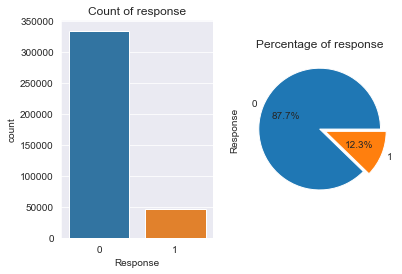

In [6]:
# visual response
plt.subplot(1, 2, 1)
sns.countplot(train['Response'])
plt.title("Count of response")

plt.subplot(1,2,2)
count = train['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%', explode = [0,0.1],title = "Percentage of response")
plt.show()

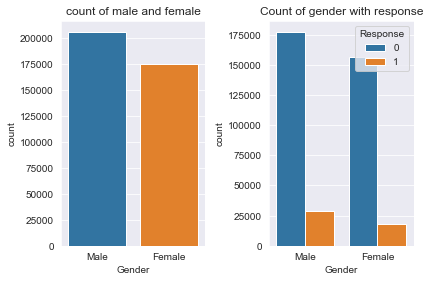

In [5]:
# visual gender
plt.subplot(1, 2, 1)
sns.countplot(train['Gender'])
plt.title("count of male and female")
plt.subplot(1, 2, 2)
sns.countplot('Gender', hue = 'Response',data = train)
plt.title("Count of gender with response")
plt.tight_layout(pad=1.0)
plt.show()

From figure above I find that the gender variable in the dataset is almost equally distributed.

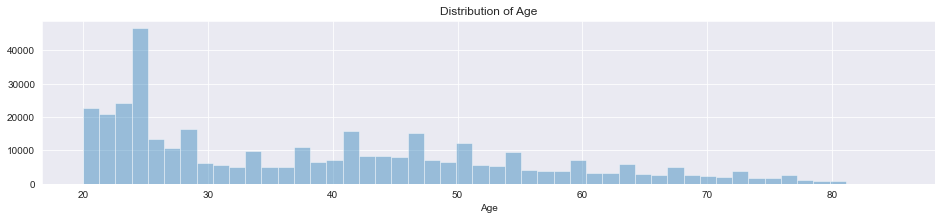

In [22]:
# visual age
plt.figure(figsize = (16,3))
sns.distplot(train['Age'], kde=False)
plt.title('Distribution of Age')
plt.show()

From figure above I find that the distribution of the indivisuals with age 24 are greater in the dataset.

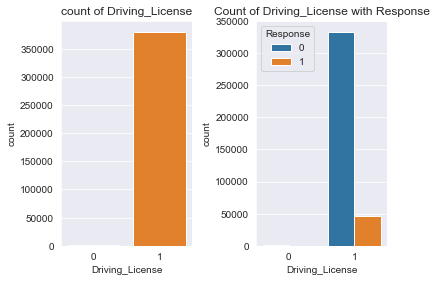

In [27]:
# visual license
plt.subplot(1, 2, 1)
sns.countplot(train['Driving_License'])
plt.title("count of Driving_License")
plt.subplot(1, 2, 2)
sns.countplot('Driving_License', hue = 'Response',data=train)
plt.title("Count of Driving_License with Response")
plt.tight_layout(pad=1.0)
plt.show()

From figure above I find that customers who are interested in Vehicle Insurance almost all have driving license.

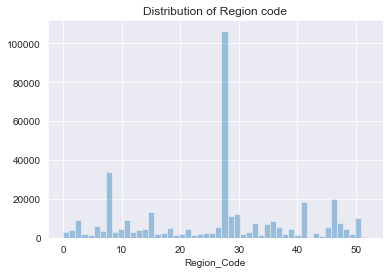

<Figure size 720x504 with 0 Axes>

In [10]:
# visual Region Code
sns.distplot(train['Region_Code'], kde=False)
plt.title('Distribution of Region code')
plt.figure(figsize = (10,7))
plt.show()

From figure above I find that the indivisuals with region code 28 the highest as compared to the other ones.

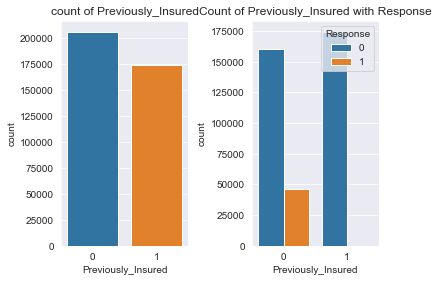

In [35]:
# visual Previously_Insured
plt.subplot(1,2,1)
sns.countplot(train['Previously_Insured'])
plt.title("count of Previously_Insured")
plt.subplot(1,2,2)
sns.countplot('Previously_Insured', hue = 'Response',data = train)
plt.title("Count of Previously_Insured with Response")
plt.tight_layout(pad=1.0)
plt.show()

From figure above I find that the variable perviosly insured almost has equal count and customer who are not perviosly insured are likely to be inetrested.

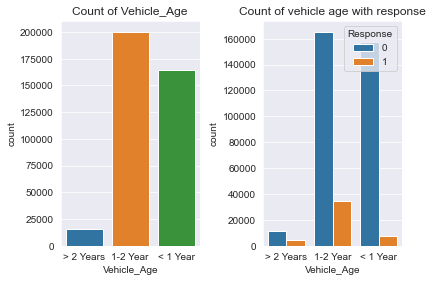

In [37]:
# visual Vehicle Age
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Age'])
plt.title("Count of Vehicle_Age")
plt.subplot(1,2,2)
plt.title("Count of vehicle age with response")
sns.countplot('Vehicle_Age', hue = 'Response',data = train)
plt.tight_layout(pad=1.0)
plt.show()

From figure above I find that there is very less number of customers with vechicle age less than 2 years and customers with vechicle age 1-2 years are more likely to interested as compared to the other two.

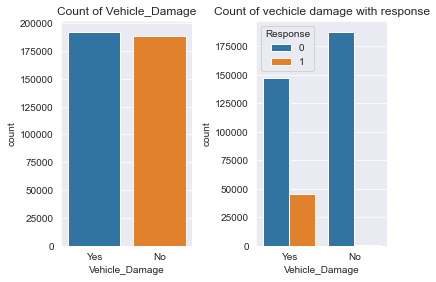

In [39]:
# visual vechicle damage
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Damage'])
plt.title("Count of Vehicle_Damage")
plt.subplot(1,2,2)
plt.title("Count of vechicle damage with response")
sns.countplot('Vehicle_Damage', hue = 'Response',data = train)
plt.tight_layout(pad=1.0)
plt.show()

From figure above I find that customers with vechicle damage are more interested in Vehicle Insurance.

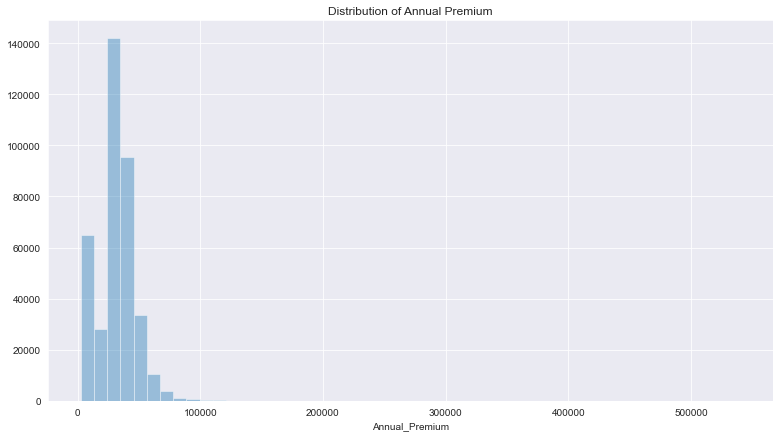

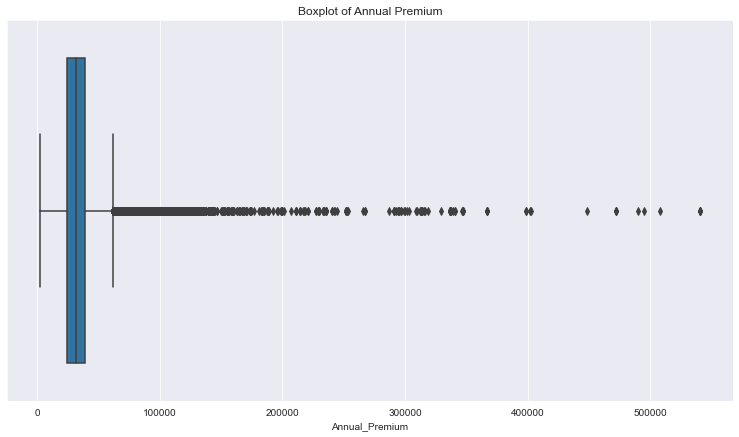

In [50]:
# visual Annual_Premium
plt.figure(figsize=(13,7))
sns.distplot(train['Annual_Premium'], kde=False)
plt.title("Distribution of Annual Premium")
plt.show()

plt.figure(figsize=(13,7))
sns.boxplot(train['Annual_Premium'])
plt.title("Boxplot of Annual Premium")
plt.show()

From figure above I find that the annual premimum variable is right skewed and have some outliers.

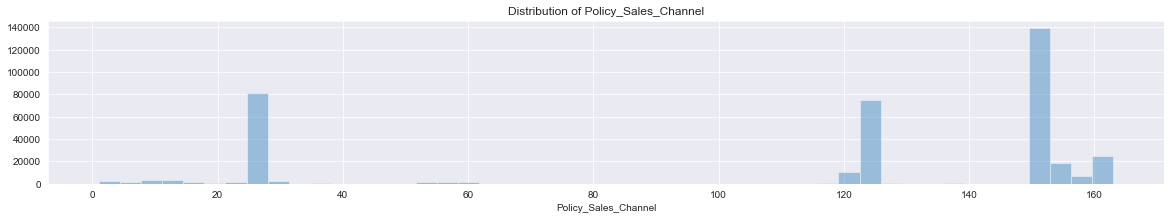

In [53]:
# visual Distribution of Policy_Sales_Channel
plt.figure(figsize = (20,3))
plt.title("Distribution of Policy_Sales_Channel")
sns.distplot(train['Policy_Sales_Channel'], kde=False)
plt.show()

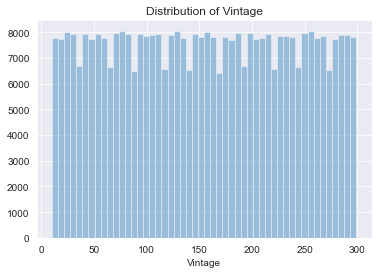

In [55]:
# visual Vintage
plt.title("Distribution of Vintage")
sns.distplot(train['Vintage'], kde=False)
plt.show()

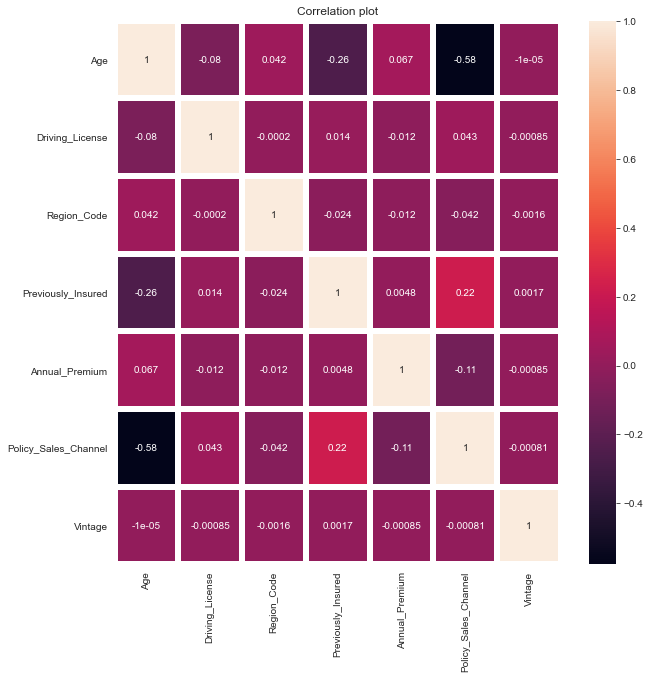

In [11]:
# Correlation of features with target variable
col = train.columns.tolist()
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
correlation = numerical_cols.corr()
sns.heatmap(correlation, linewidths=5,annot=True)
plt.show()

From figure above I find that policy sales channel and vintage are more negatively correlated to the target variable response.

In [7]:
#Split into train, valid and test dataset
x = X.loc[train.index]
y = y.loc[train.index]
test = X.loc[test.index]
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size= 0.25, random_state=42, stratify=y, shuffle=True)
print(X_train.shape)
print(X_valid.shape)
print(test.shape)

(285831, 10)
(95278, 10)
(127037, 10)


## Feature Engineering

For feature engineering, I used StandardScaler, MinMaxScaler and LabelEncoder provided by sklearn to do data standardization processing to improve the model accuracy and convergence speed [5].<br /> 
StandardScaler refers to the standardized data by subtracting the mean and dividing by the variance (or standard deviation). The standardized data method is processed to conform to the standard normal distribution, that is, the mean is 0 and the standard deviation is 1. I used StandardScaler for Age and Vintage.<br /> 
MinmaxScaler scales the feature to a specific interval scales the feature to a given minimum and maximum value, or it can also convert the maximum absolute value of each feature to unit size. This method is a linear transformation of the original data, normalizing the data to the middle of [0,1]. I used MinmaxScaler for Annual_Premium.<br />
LabelEncoder assigns various tags to a countable sequential number. This step is necessary because machine learning models do not accept object type data. I used LabelEncoder for Vehicle_Age, Gender and Vehicle_Damage.<br />


In [8]:
# use StandardScaler, MinMaxScaler and LabelEncoder
ss = StandardScaler()
mm = MinMaxScaler()
le = LabelEncoder()

In [9]:
X_train[['Age']]= ss.fit_transform(X_train[['Age']])
X_valid[['Age']] = ss.transform(X_valid[['Age']])
test[['Age']] = ss.transform(test[['Age']])

X_train[['Vintage']] = ss.fit_transform(X_train[['Vintage']])
X_valid[['Vintage']] = ss.transform(X_valid[['Vintage']])
test[['Vintage']] = ss.transform(test[['Vintage']])

X_train[['Annual_Premium']] = mm.fit_transform(X_train[['Annual_Premium']])
X_valid[['Annual_Premium']] = mm.transform(X_valid[['Annual_Premium']])
test[['Annual_Premium']] = mm.transform(test[['Annual_Premium']])

X_train['Vehicle_Age'] = le.fit_transform(X_train['Vehicle_Age'])
X_valid['Vehicle_Age'] = le.transform(X_valid['Vehicle_Age'])
test['Vehicle_Age'] = le.transform(test['Vehicle_Age'])

X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_valid['Gender'] = le.transform(X_valid['Gender'])
test['Gender'] = le.transform(test['Gender'])

X_train['Vehicle_Damage'] = le.fit_transform(X_train['Vehicle_Damage'])
X_valid['Vehicle_Damage'] = le.transform(X_valid['Vehicle_Damage'])
test['Vehicle_Damage'] = le.transform(test['Vehicle_Damage'])

# converting the float variables to int because cat boost dosen't take float for categorical variables
X_train['Region_Code']=X_train['Region_Code'].astype(int)
X_valid['Region_Code']=X_valid['Region_Code'].astype(int)
test['Region_Code']=test['Region_Code'].astype(int)

X_train['Policy_Sales_Channel']=X_train['Policy_Sales_Channel'].astype(int)
X_valid['Policy_Sales_Channel']=X_valid['Policy_Sales_Channel'].astype(int)
test['Policy_Sales_Channel']=test['Policy_Sales_Channel'].astype(int)

An example of the data after feature engineering show below.

In [10]:
print(X_train.head())

        Gender       Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                           
285702       0 -1.084881                1            2                   1   
15605        1  0.397875                1           30                   1   
10682        1 -0.762543                1           27                   1   
39612        1  1.107019                1           36                   0   
42515        1 -1.020413                1           29                   1   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
id                                                                          
285702            1               0        0.055488                   152   
15605             0               0        0.000000                   124   
10682             1               0        0.057886                   152   
39612             0               1        0.000000                 

# 4.Methods & 5.Experiments and Results
The principle of univariate feature selection is to judge and select important indicators according to a certain statistical indicator of each variable after calculating it separately. It has Pearson correlation coefficient, f_regression, mutual_info_regression, maximum information coefficient and so on can be used [6].<br />
For the insurance prediction, I used SelectKBest which can keep the K features with the highest ratingprovided by sklearn to select 8 features from original 10 features.

Scikit-Learn (sklearn) is a commonly used third-party module in machine learning, which encapsulates commonly used machine learning methods, including Regression, Dimensionality Reduction, Classfication, Clustering and other methods. Sklearn, built on top of Numpy, Scipy, Matplotlib, is a simple and efficient data mining and analysis tool that can be used repeatedly by anyone in complex environments [7].

I established LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier and DNN 7 machine learning models.<br />
For each model, I set ‘random_state=42’ to keep the training results consistent, ‘n_jobs=-1’ to use the entire CPU and ‘verbose=100’ to output the training logs. I used ‘predict_proba’ provided by sklearn to calculate the probability that a customer will purchase insurance, and I used ‘roc_auc_score’ provided by sklearn as the metric for the predicted result. The roc_auc_score() function calculates AUC (area under curve) by calculating the sum of the small trapezoids of the areas under the ROC curve through the idea of limit approximation. Besides, I used ‘predict’ provided by sklearn to predict whether the customer will purchase insurance and drew the confusion matrix  (2*2) as the result.<br /> 

Sklearn provides GridSearchCV and RandomizedSearchCV to do the hyperparameter tuning. GridSearchCV stands for grid search and cross validation. Grid search, that is, within the specified parameter range, the parameters are adjusted according to the step size in turn, and the adjusted parameters are used to train the learner to find the parameter with the highest precision on the verification set from all the parameters. GridSearchCV guarantees to find the most accurate parameters within the specified parameter range, but it requires a time-consuming traversal of all possible combinations of parameters. The use of RandomizedSearchCV is the same as that of GridSearchCV, but it replaces grid search with random sampling in the parameter space. For parameters with continuous variables, RandomizedSearchCV will sample them as a distribution, which grid search cannot do, and its searchability depends on the set ‘n_iter’ parameter [8]. I used RandomizedSearchCV to do the hyperparameter tuning for each model. 

RandomizedSearchCV requires the base model for parameter tuning and uses ‘param_distributions’ to set different parameter candidates. Set ‘cv’ to 3 to specify the number of the fold (cross-validation), set ‘verbose’ to output the training process log, and set ‘n_iter’ to control the loop tests. Finally, the optimal parameters of the corresponding model are obtained by the ‘best_params_’ method.

## Feature Selection

In [11]:
# set k to 8 to select 8 features
selector = SelectKBest(f_classif, k=8)
X_train_t = selector.fit_transform(X_train, y_train)
selected_features = pd.DataFrame(selector.inverse_transform(X_train_t),
                                 index=X_train.index,
                                 columns=X_train.columns)
selected_columns = selected_features.columns[selected_features.var() != 0]
print(selected_columns)

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel'],
      dtype='object')


## Modles

### LogisticRegression

LogisticRegression is one of the most commonly used and classic classification methods in machine learning provided by sklearn. Although it is called a regression model, it deals with the classification problem, mainly because it is essentially a linear model with a mapping function Sigmoid, which maps the continuous results from the linear model to the discrete model [9]. Simply put, it is the probability of converting the output value of linear regression to [0,1] through the Sigmoid function.

The Sigmoid expression and function images are shown below.
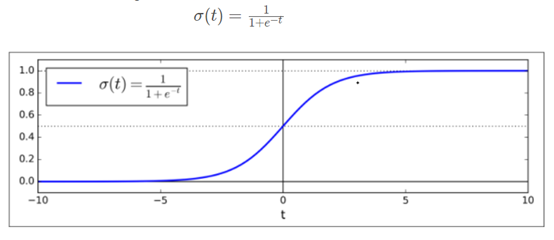

The logistic regression function is 
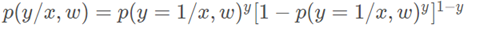

Select the optimization algorithm by setting ‘solver’. I used two optimization algorithms, ‘liblinear’ and ‘lbfgs’. ‘Liblinear’ uses the open-source Liblinear library to realize, and internally uses the axis descent method to iteratively optimize the loss function. ‘Lbfgs’ is a kind of quasi-Newton method, which uses the second derivative matrix of the loss function, namely the Hessen matrix, to iteratively optimize the loss function. ‘Max_iter’ sets the maximum iteration number of convergence of the algorithm. ‘C’ sets the reciprocal of the regularization coefficient λ. The smaller the value, the stronger the regularization. ‘Penalty’ sets the penalty item, with optional parameters ‘l1’ and ‘l2’, to specify the specification to be used in the penalty item. L1G specification assumes that the model parameters meet Laplace distribution, L2 hypothesis model parameters meet Gaussian distribution. Paradigm is to add constraints on parameters to make the model less overfit.


In [12]:
# Tuing
# set base model
lr = LogisticRegression(random_state=42, n_jobs=-1)
param = {'solver':['lbfgs','liblinear','newton-cg','sag'],
         'C':[0.5,1,3,5],
         'max_iter':[100,500,1000,2000],
         'penalty':['l1','l2']
         }
# randm accept 10 features
randm = RandomizedSearchCV(lr, param_distributions = param, cv=3, refit = True, n_iter = 10, n_jobs=-1, verbose=100)
randm.fit(X_train, y_train)

# randm_t accept 8 features
randm_t = RandomizedSearchCV(lr, param_distributions = param, cv=3, refit = True, n_iter = 10, n_jobs=-1, verbose=100)
randm_t.fit(X_train_t, y_train)
print("\n The best parameters across all searched params:\n", randm.best_params_)
print("\n The best parameters for selected features across all searched params:\n", randm_t.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   2

In [12]:
# lr accept 10 features
lr = LogisticRegression(random_state=42, n_jobs=-1,verbose=100,solver='liblinear',C=1,max_iter=100,penalty='l1')
lr = lr.fit(X_train, y_train)
lr_predict = lr.predict_proba(X_valid)[:, 1]

# lr_t accept 8 features
lr_t = LogisticRegression(random_state=42, n_jobs=-1,verbose=100,solver='lbfgs',C=0.5,max_iter=500,penalty='l2')
lr_t = lr_t.fit(X_train_t, y_train)
lr_predict_t = lr_t.predict_proba(X_valid[selected_columns])[:, 1]

print('LogisticRegression ROC AUC SCORE: {}'.format(roc_auc_score(y_valid, lr_predict)))
print('LogisticRegression using feature selection ROC AUC SCORE: {}'.format(roc_auc_score(y_valid, lr_predict_t)))

[LibLinear][Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.9s finished
LogisticRegression ROC AUC SCORE: 0.8218471939630483
LogisticRegression using feature selection ROC AUC SCORE: 0.8218543732499912


Text(34.0, 0.5, 'True labels')

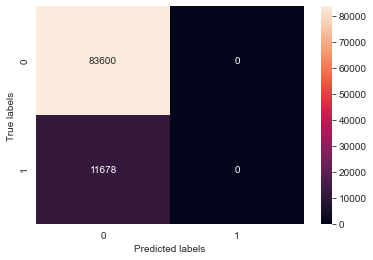

In [13]:
# confusion matrix
preds = lr_t.predict(X_valid[selected_columns])

cm = confusion_matrix(y_valid, preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

### DecisionTreeClassifier

A decision tree is a tree structure in which each internal node represents a test on an attribute, each branch represents a test output, and each leaf represents a category. Decision tree learning is inductive learning based on examples and adopts the recursion method from top to bottom. Its basic idea is to construct a tree whose entropy value drops fastest based on information entropy as a measure. The entropy value to the leaf node is zero, and the instances in each leaf node belong to the same class. The key to establishing the decision tree is which attribute is selected as the classification basis under the current state. According to different objective functions, there are mainly three algorithms for establishing decision trees: information gain is used in ID3, information gain rate is used in C4.5, and Gini coefficient is used in CART [10].<br /> 

‘Criterion’ is the feature selection criterion and you can select 'gini' or 'entropy' (default= "gini") where the former is the Gini coefficient and the latter is the entropy of information. The ‘splitter’ parameter is used to set the feature partition criteria, and "best" or "random" (default= "best") can be selected. ‘Best’ finds the optimal partition point among all the partition points of the feature. ‘Random’ is to find the locally optimal partition point among partial partition points at random. If the sample data is very large, then the decision tree constructs recommendation randomly. The ‘max_depth’ parameter controls the maximum depth of the decision tree and is often used to solve overfitting. ‘Min_samples_split’ is the minimum sample number required for internal node repartition. ‘Min_samples_leaf’ is the minimum sample number of leaf nodes, which limits the minimum sample number of leaf nodes. ‘Max_leaf_nodes’ is the maximum number of leaf nodes to prevent overfitting.

In [15]:
# Tuning
# set base model
dtc = DecisionTreeClassifier(random_state=42)
param = {'max_depth': [10,20,50,100],
         "splitter": ['best','random'],
         'max_leaf_nodes': [20,50,100],
         'min_samples_split': [5, 10, 20],
        'min_samples_leaf':[1,5,10]}
# randm accept 10 features
randm = RandomizedSearchCV(dtc, param_distributions = param, cv=3, refit = True, n_iter = 10, n_jobs=-1, verbose=100)
randm.fit(X_train, y_train)

# randm_t accept 8 features
randm_t = RandomizedSearchCV(dtc, param_distributions = param, cv=3, refit = True, n_iter = 10, n_jobs=-1, verbose=100)
randm_t.fit(X_train_t, y_train)
print("\n The best parameters across all searched params:\n", randm.best_params_)
print("\n The best parameters for selected features across all searched params:\n", randm_t.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    

In [49]:
# dtc accept 10 features
dtc = DecisionTreeClassifier(random_state=42, max_depth=20, splitter='random', min_samples_leaf=1, max_leaf_nodes=50, min_samples_split=5)
dtc=dtc.fit(X_train, y_train)
dtc_predict_proba = dtc.predict_proba(X_valid)[:, 1]
print('DecisionTreeClassifier ROC AUC SCORE: {}'.format(roc_auc_score(y_valid, dtc_predict_proba)))

# dtc_t accept 8 features
dtc_t = DecisionTreeClassifier(random_state=42, max_depth=20, splitter='random', min_samples_leaf=5, max_leaf_nodes=100, min_samples_split=20)
dtc_t=dtc_t.fit(X_train_t, y_train)
dtc_predict_proba_t = dtc_t.predict_proba(X_valid[selected_columns])[:, 1]
print('DecisionTreeClassifier using feature selection ROC AUC SCORE: {}'.format(roc_auc_score(y_valid, dtc_predict_proba_t)))

DecisionTreeClassifier ROC AUC SCORE: 0.8497230699405335
DecisionTreeClassifier using feature selection ROC AUC SCORE: 0.8496354988236992


Text(34.0, 0.5, 'True labels')

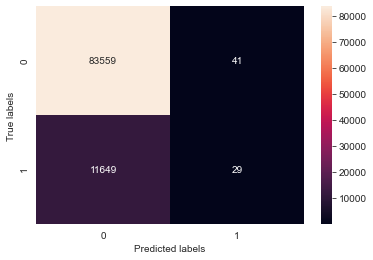

In [14]:
# confusion matrix
preds = dtc_t.predict(X_valid[selected_columns])

cm = confusion_matrix(y_valid, preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

Boosting and bagging are the two major categories of ensemble learning.<br /> 
XGBoost, LightGBM and Catboost are three representative boosting methods based on GBDT (Gradient Boosting Decision Tree). Random Forest is a bagging method.<br /> 
Boosting is a supervised classification learning method. It combines many "weak" classifiers to produce a strong group of classifiers. The performance of a weak classifier is only slightly better than that of random selection, so it can be designed to be very simple and without too much computational cost. The underlying machine learning algorithm under different allocations can be applied to discover weak rules, and each algorithm generates a weak rule. Boosting algorithms can combine them into a powerful decision rule after several iterations [11].<br /> 
GBDT is a method based on a decision tree that uses gradient as information to weight different weakly classified decision trees, to obtain better performance. First, it will initialize the value of y_hat at time 0. Then, finding the residual error and by thinking like gradient descent, every time y moves a little bit in the direction of gradient descent. It's just that, in GBDT, a small shift in y is not a variable, but a function. Next, it will build the decision tree. The decision tree is used to approximate the residual - g to obtain the decision tree: f_t. Finally, it will calculate the weight of leaf nodes and update output y. Y (t) = y(t - 1) + learning_rate * f_t [12]. The demo is shown below.
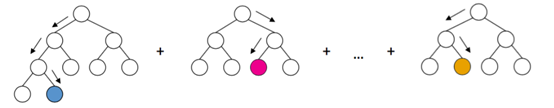
Compared to the Boosting series, the bagging algorithm is much simpler. Input is the sample set D={(x,y1),(x2,y2)...(xm,ym)}, weak learner algorithm, weak classifier iteration times T.The output is the final strong classifier f(x).<br /> 
1) For t=1,2...,T:<br /> 
The training set is randomly sampled for the t time, and a total of m times are collected to obtain a sampling set containing m samples. The t th weak learner is trained with the sample set.<br /> 
2) If it is predicted by the classification algorithm, the category or one of the categories with the most votes cast by T weak learners is the final category. If it is a regression algorithm, the arithmetic average value of the regression results obtained by T weak learners is the final model output.<br /> 


### RandomForestClassifier

Random Forest (hereinafter referred to as RF) is an evolutionary version of the Bagging algorithm. First, RF uses the CART decision tree as a weak learner. Secondly, based on using the decision tree, RF improves the establishment of the decision tree. RF randomly selects some sample features on the node and then selects an optimal feature among these randomly selected sample features to make the left and right subtree division of the decision tree. This further enhances the generalization ability of the model [13].

‘N_estimators’ sets the number of determinants in the tree. The ‘max_depth’ parameter controls the maximum depth of the decision tree and is often used to solve overfitting. ‘Min_samples_split’ is the minimum sample number required for internal node repartition. ‘Min_samples_leaf’ is the minimum sample number of leaf nodes, which limits the minimum sample number of leaf nodes. ‘Max_leaf_nodes’ is the maximum number of leaf nodes to prevent overfitting. Set ‘bootstrap’ to determine whether to use a fallback sample.

In [8]:
# Tuning
# set base model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
param = { 'n_estimators':[50,100,500,1000],
          'max_depth':[10,20,50,100],
          'max_leaf_nodes': [20,50,100],
         'min_samples_split': [5, 10, 20],
        'min_samples_leaf':[1,5,10]
        }
# randm accept 10 features
randm = RandomizedSearchCV(rfc, param_distributions = param, cv=3, refit = True, n_iter = 10, n_jobs=-1, verbose=100)
randm.fit(X_train, y_train)

# randm_t accept 8 features
randm_t = RandomizedSearchCV(rfc, param_distributions = param, cv=3, refit = True, n_iter = 10, n_jobs=-1, verbose=100)
randm_t.fit(X_train_t, y_train)
print("\n The best parameters across all searched params:\n", randm.best_params_)
print("\n The best parameters for selected features across all searched params:\n", randm_t.best_params_)   

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)



 The best parameters across all searched params:
 {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_leaf_nodes': 100, 'max_depth': 100}

 The best parameters for selected features across all searched params:
 {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_leaf_nodes': 50, 'max_depth': 10}


In [50]:
# rfc accetp 10 features
rfc = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=50,min_samples_split=10, min_samples_leaf=10,max_depth=100, max_leaf_nodes=100,bootstrap=True,verbose=100)
rfc=rfc.fit(X_train,y_train)
pred_proba = rfc.predict_proba(X_valid)[:, 1]

# rfc_t accetp 8 features
rfc_t = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=500,min_samples_split=20, min_samples_leaf=10,max_depth=10, max_leaf_nodes=50,bootstrap=True,verbose=100)
rfc_t=rfc_t.fit(X_train_t, y_train)
predict_proba_t = rfc_t.predict_proba(X_valid[selected_columns])[:, 1]

print('RandomForestClassifier ROC AUC SCORE: {}'.format(roc_auc_score(y_valid, pred_proba)))
print('RandomForestClassifier using feature selection ROC AUC SCORE: {}'.format(roc_auc_score(y_valid, predict_proba_t)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 50building tree 2 of 50

building tree 3 of 50building tree 4 of 50

building tree 5 of 50[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s

building tree 6 of 50[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s

building tree 7 of 50[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.3s

building tree 8 of 50[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s

building tree 9 of 50[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s

building tree 10 of 50[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s

building tree 11 of 50[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.7s

building tree 12 of 50[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.7s

building tree 13 of 50[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s

building tree 14 of 50[Parallel(n_jobs=-1)]: Done  10 tasks      | elap

building tree 9 of 500[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
building tree 10 of 500[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s


building tree 11 of 500[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.4s

building tree 12 of 500[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s

building tree 13 of 500[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s

building tree 14 of 500[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s

building tree 15 of 500[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.6s

building tree 16 of 500[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s

building tree 17 of 500[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.8s

building tree 18 of 500[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.8s

building tree 19 of 500[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.8s

building tree 20 of 500[Parallel(n_jobs=-1)]: Done  16 


building tree 106 of 500[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    6.0s

building tree 107 of 500[Parallel(n_jobs=-1)]: Done 103 tasks      | elapsed:    6.0s

building tree 108 of 500[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.0s

building tree 109 of 500[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    6.1s

building tree 110 of 500[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    6.1s

building tree 111 of 500[Parallel(n_jobs=-1)]: Done 107 tasks      | elapsed:    6.2s

building tree 112 of 500[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    6.3s

building tree 113 of 500[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:    6.3s

building tree 114 of 500[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.3s

building tree 115 of 500[Parallel(n_jobs=-1)]: Done 111 tasks      | elapsed:    6.5s

building tree 116 of 500[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.5s

building tree 117 of 500building tree 118 


building tree 203 of 500[Parallel(n_jobs=-1)]: Done 199 tasks      | elapsed:   11.1s

building tree 204 of 500[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:   11.2s

building tree 205 of 500[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:   11.3s

building tree 206 of 500
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   11.3s
building tree 207 of 500[Parallel(n_jobs=-1)]: Done 203 tasks      | elapsed:   11.3s

building tree 208 of 500[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:   11.4s

building tree 209 of 500[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   11.5s

building tree 210 of 500[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:   11.5s

building tree 211 of 500[Parallel(n_jobs=-1)]: Done 207 tasks      | elapsed:   11.5s

building tree 212 of 500[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   11.6s

building tree 213 of 500[Parallel(n_jobs=-1)]: Done 209 tasks      | elapsed:   11.6s

building tree 214 of 500[Parallel(n_jobs=-

building tree 300 of 500[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   16.4s

building tree 301 of 500building tree 302 of 500[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:   16.4s


[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:   16.4s
building tree 303 of 500[Parallel(n_jobs=-1)]: Done 299 tasks      | elapsed:   16.4s

building tree 304 of 500[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   16.5s

building tree 305 of 500[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   16.6s

building tree 306 of 500[Parallel(n_jobs=-1)]: Done 302 tasks      | elapsed:   16.6s

building tree 307 of 500
[Parallel(n_jobs=-1)]: Done 303 tasks      | elapsed:   16.7s
building tree 308 of 500[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   16.8s

building tree 309 of 500[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   16.8s

building tree 310 of 500[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:   16.8s

building tree 311 of 500[Parallel(n_jobs=-1


building tree 396 of 500[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:   22.3s

building tree 397 of 500building tree 398 of 500[Parallel(n_jobs=-1)]: Done 393 tasks      | elapsed:   22.4s


[Parallel(n_jobs=-1)]: Done 394 tasks      | elapsed:   22.4s
building tree 399 of 500[Parallel(n_jobs=-1)]: Done 395 tasks      | elapsed:   22.4s

building tree 400 of 500[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:   22.5s

building tree 401 of 500[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   22.6s

building tree 402 of 500[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:   22.6s

building tree 403 of 500[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:   22.7s

building tree 404 of 500[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:   22.8s

building tree 405 of 500[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:   22.9s

building tree 406 of 500
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   22.9s
building tree 407 of 500[Parallel(n_jobs=-

building tree 494 of 500[Parallel(n_jobs=-1)]: Done 490 tasks      | elapsed:   28.6s

building tree 495 of 500[Parallel(n_jobs=-1)]: Done 491 tasks      | elapsed:   28.6s

building tree 496 of 500[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:   28.7s

building tree 497 of 500[Parallel(n_jobs=-1)]: Done 493 tasks      | elapsed:   28.8s

building tree 498 of 500
building tree 499 of 500
building tree 500 of 500
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   29.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.0s

[Parallel(n_jobs=4)]: Done 132 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 133 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 134 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 135 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 138 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 139 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 140 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 141 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 142 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 143 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 145 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 146 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 147 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 315 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 316 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 317 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 318 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 319 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 321 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 322 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 323 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 324 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 325 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 326 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 327 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 328 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 329 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 330 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Do

RandomForestClassifier ROC AUC SCORE: 0.8549613912308837
RandomForestClassifier using feature selection ROC AUC SCORE: 0.8542144017376968


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=4)]: Done 204 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 205 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 206 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 207 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 208 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 209 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 210 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 211 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 214 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 215 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 216 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 217 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 219 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 353 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 354 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 355 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 356 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 358 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 359 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 360 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 361 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 362 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 363 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 364 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 365 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 366 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 367 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 368 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Do

Text(34.0, 0.5, 'True labels')

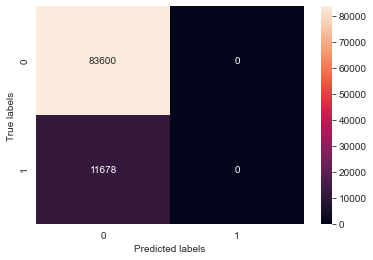

In [16]:
# confusion matrix
preds = rfc_t.predict(X_valid[selected_columns])

cm = confusion_matrix(y_valid, preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

### XGBClassifier

XGBoost (Extreme Gradient Boosting) is an open-source machine learning project developed by Chen Tianqi et al., characterized by fast calculation speed and good performance of the model, which can be used in classification and regression problems. LightGBM (Light Gradient Boosting Machine) is a machine learning framework open source by Microsoft, has higher training speed and efficiency, lower memory, higher accuracy, and supports parallel learning and processing of large-scale data. Catboost (Categorical Features + Gradient Boosting) is open-source by Yandex, a Russian company, adopts a strategy that reduces overfitting while ensuring that all data sets are available for learning. Excellent performance, robustness and versatility, easy to use and more practical.<br /> 
XGBoost explicitly adds the complexity of the tree model as a regular term to the optimization goal. The derivation uses the second derivative information, whereas the ordinary GBDT only uses the first. XGBoost allows column feature sampling to prevent overfitting. XGBoost implements an approximate algorithm for splitting node-seeking to accelerate and reduce memory consumption. And its node splitting algorithm can automatically take advantage of feature sparsity. The sample data is arranged in advance and stored in block form, which is convenient for parallel computation. Its penalty function Omega mainly penalizes the leaf number and leaf fraction of a tree, ensuring the simplicity of the tree. XGBoost also supports distributed computing and can run on MPI, YARN [14].

‘Scale_pos_weight’ is the weight of the positive sample. In the dichotomy task, when the proportion of positive and negative samples is unbalanced, the weight of the positive sample is set to achieve a better model effect. ‘N_estimatores’ is the total number of iterations, that is, the number of decision trees. ‘Early_stopping_rounds’ refer to the early termination of the training to prevent overfitting on the verification set when the score does not improve after n consecutive iterations. ‘Subsample’ refers to the proportion of data used in the whole training set during the training of each tree, which can prevent overfitting. ‘Learning_rate’ is the learning rate, which controls the step size of each iteration when updating the weight. ‘Objective’ is the objective function and is set to 'binary: Logistic' in this model. Set eval_metric to ‘auc’ to calculate the area under curve.

In [13]:
# Tuing
# set base model
xgboost = XGBClassifier(random_state=42, n_jobs=-1)
param ={'n_estimatores':[100,500,1000],
        'max_depth':[3,6,9],
        'learning_rate':[0.1,0.2,0.3],
        'subsample':[0.5,0.7,1]
}
#randm accept 10 features
randm = RandomizedSearchCV(xgboost, param_distributions = param, cv=3, refit = True, n_iter = 10, n_jobs=-1, verbose=100)
randm.fit(X_train, y_train)

#randm_t accept 8 features
randm_t = RandomizedSearchCV(xgboost, param_distributions = param, cv=3, refit = True, n_iter = 10, n_jobs=-1, verbose=100)
randm_t.fit(X_train_t, y_train)

print("\n The best parameters across all searched params:\n", randm.best_params_)
print("\n The best parameters for selected across all searched params:\n", randm_t.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.

In [17]:
# xgboost accept 10 features
xgboost = XGBClassifier(random_state=42, n_jobs=-1, scale_pos_weight=8.7, n_estimators=500, learning_rate=0.1, subsample=0.5,objective='binary:logistic')
xgboost= xgboost.fit(X_train, y_train,eval_set=[(X_valid, y_valid)],early_stopping_rounds=10,verbose=100,eval_metric='auc')

# xgboost_t accept 8 features
xgboost_t = XGBClassifier(random_state=42, n_jobs=-1, scale_pos_weight=8.7, n_estimators=100, learning_rate=0.3, subsample=1,objective='binary:logistic')
X_train_t_dataframe=X_train[['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel']]
xgboost_t= xgboost_t.fit(X_train_t_dataframe, y_train,eval_set=[(X_valid[selected_columns], y_valid)],early_stopping_rounds=10,verbose=100,eval_metric='auc')

# Instead of using the best tree as a model, xgboost uses the best tree depth limit to get the best one in early_stopping
pred_proba = xgboost.predict_proba(X_valid,ntree_limit=xgboost.best_ntree_limit)[:, 1]
pred_proba_t = xgboost_t.predict_proba(X_valid[selected_columns],ntree_limit=xgboost_t.best_ntree_limit)[:, 1]

print('XGBClassifier ROC AUC SCORE: {}'.format(roc_auc_score(y_valid, pred_proba)))
print('XGBClassifier using feature selection ROC AUC SCORE: {}'.format(roc_auc_score(y_valid, pred_proba_t)))

[0]	validation_0-auc:0.83895
Will train until validation_0-auc hasn't improved in 10 rounds.
Stopping. Best iteration:
[61]	validation_0-auc:0.85736

[0]	validation_0-auc:0.84195
Will train until validation_0-auc hasn't improved in 10 rounds.
Stopping. Best iteration:
[26]	validation_0-auc:0.85777

XGBClassifier ROC AUC SCORE: 0.8573571829948925
XGBClassifier using feature selection ROC AUC SCORE: 0.8577675869483452


Text(34.0, 0.5, 'True labels')

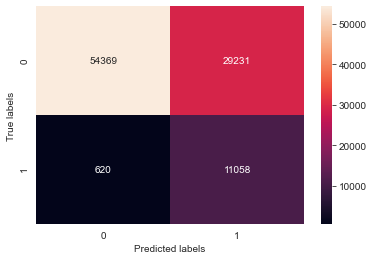

In [18]:
# confusion matrix
preds = xgboost_t.predict(X_valid[selected_columns])

cm = confusion_matrix(y_valid, preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

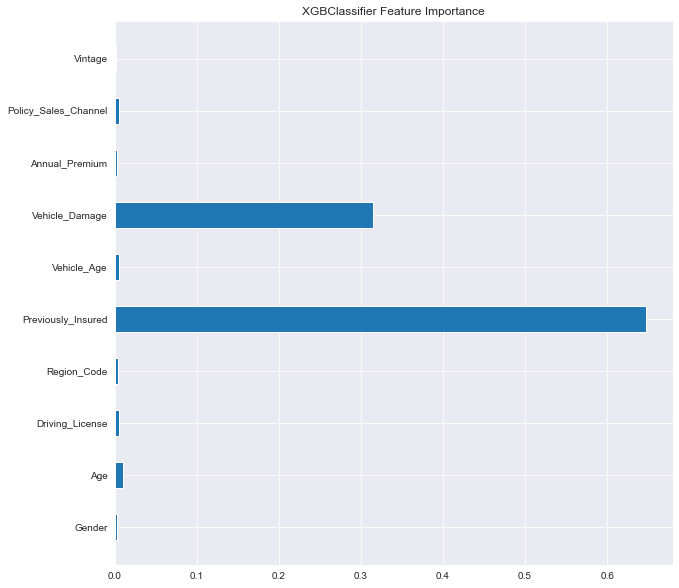

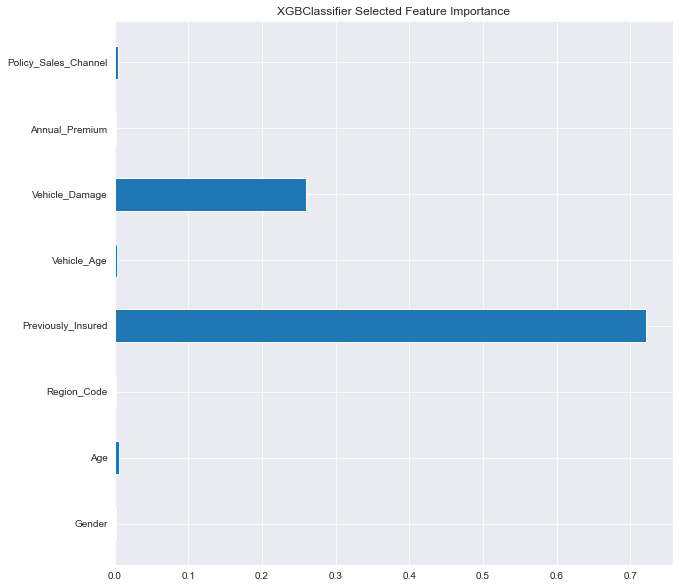

In [64]:
# Check feature importances
fea_ = xgboost.feature_importances_
col_=X_train.columns.tolist()
plt.figure(figsize=(10, 10))
plt.barh(col_,fea_,height =0.5)
plt.title("XGBClassifier Feature Importance")
plt.show()

fea_t = xgboost_t.feature_importances_
col_t=X_train_t_dataframe.columns.tolist()
plt.figure(figsize=(10, 10))
plt.barh(col_t,fea_t,height =0.5)
plt.title("XGBClassifier Selected Feature Importance")
plt.show()

### LGBMClassifier

LightGBM uses a histogram algorithm to reduce the complexity of data separation so that it occupies less memory. It discretizes continuous floating-point features into K discrete values, constructs histogram with the width of K, and then traverses training data to calculate the cumulative statistics of each discrete value in the histogram. In feature selection, according to the discrete values of the histogram, only need to traverse to find the best point, then leaves the growth strategy of wisdom, each leaf was found in all the departments maximize the amount of data is one of the largest leaves, and then divided, so the cycle, reduce errors and better accuracy of ye's faults, wise decision tree, is likely to become deeper accessories. Therefore, LightGBM adds a maximum depth constraint in the blade direction to ensure high efficiency while preventing overfitting [15].

‘N_estimatores’ is the total number of iterations, that is, the number of decision trees. ‘Early_stopping_rounds’ refer to the early termination of the training to prevent overfitting on the verification set when the score does not improve after n consecutive iterations. ‘Learning_rate’ is the learning rate, which controls the step size of each iteration when updating the weight. ‘Objective’ is the objective function and is set to 'binary' in this model. Set eval_metric to ‘auc’ to calculate the area under curve. ‘Bagging_freq’ and ‘bagging_fraction’ refer to the exponents associated with segmentation.

In [55]:
# Tuing
# set base model
lgb = LGBMClassifier(random_state=42, n_jobs=-1)
param ={'max_depth': [8, 10, 20],
              'learning_rate': [0.05, 0.1, 0.2],
              'feature_fraction': [0.6, 0.8, 0.95],
              'bagging_fraction': [0.6, 0.8, 0.95],
              'bagging_freq': [2, 5, 8]
}
# randm accept 10 features
randm = RandomizedSearchCV(lgb, param_distributions = param, cv=3, refit = True, n_iter = 10, n_jobs=-1, verbose=100)
randm.fit(X_train, y_train)

# randm_t accept 8 features
randm_t = RandomizedSearchCV(lgb, param_distributions = param, cv=3, refit = True, n_iter = 10, n_jobs=-1, verbose=100)
randm_t.fit(X_train_t, y_train)

print("\n The best parameters across all searched params:\n", randm.best_params_)
print("\n The best parameters for selected across all searched params:\n", randm_t.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   1

In [14]:
# lgb accept 10 features
lgb = LGBMClassifier(boosting_type='gbdt',n_estimators=500, learning_rate=0.05,objective='binary',metric='auc',is_unbalance=True,
                     feature_fraction=0.6,bagging_freq=8,bagging_fraction=0.6,max_depth=10,random_state=42,n_jobs=-1)
lgb= lgb.fit(X_train, y_train, eval_metric='auc',eval_set=(X_valid, y_valid),verbose=100,early_stopping_rounds= 20)

# lgb_t accept 8 features
lgb_t = LGBMClassifier(boosting_type='gbdt',n_estimators=500, learning_rate=0.05,objective='binary',metric='auc',is_unbalance=True,
                     feature_fraction=0.6,bagging_freq=8,bagging_fraction=0.6,max_depth=10,random_state=42,n_jobs=-1)
X_train_t_dataframe=X_train[['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel']]
lgb_t= lgb_t.fit(X_train_t_dataframe, y_train, eval_metric='auc',eval_set=(X_valid[selected_columns], y_valid),verbose=100,early_stopping_rounds= 20)

pred_proba = lgb.predict_proba(X_valid)[:, 1]
pred_proba_t = lgb_t.predict_proba(X_valid[selected_columns])[:, 1]
print('Lightgbm ROC AUC SCORE: {}'.format(roc_auc_score(y_valid, pred_proba)))
print('Lightgbm using feature selection ROC AUC SCORE: {}'.format(roc_auc_score(y_valid, pred_proba_t)))

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 20 rounds
[100]	valid_0's auc: 0.857897
Early stopping, best iteration is:
[178]	valid_0's auc: 0.858266
Training until validation scores don't improve for 20 rounds
[100]	valid_0's auc: 0.858184
Early stopping, best iteration is:
[179]	valid_0's auc: 0.858628
Lightgbm ROC AUC SCORE: 0.8582664557164291
Lightgbm using feature selection ROC AUC SCORE: 0.8586276125680234


Text(34.0, 0.5, 'True labels')

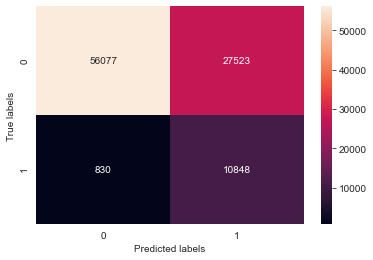

In [15]:
# confusion matrix
preds = lgb_t.predict(X_valid[selected_columns])

cm = confusion_matrix(y_valid, preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

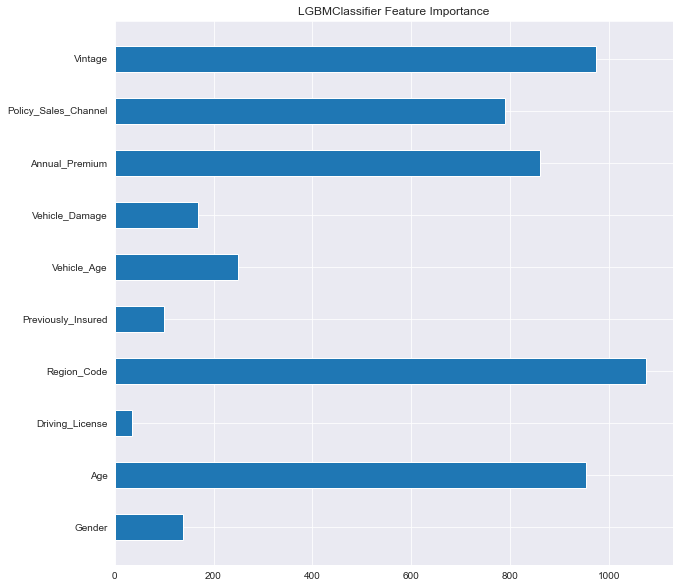

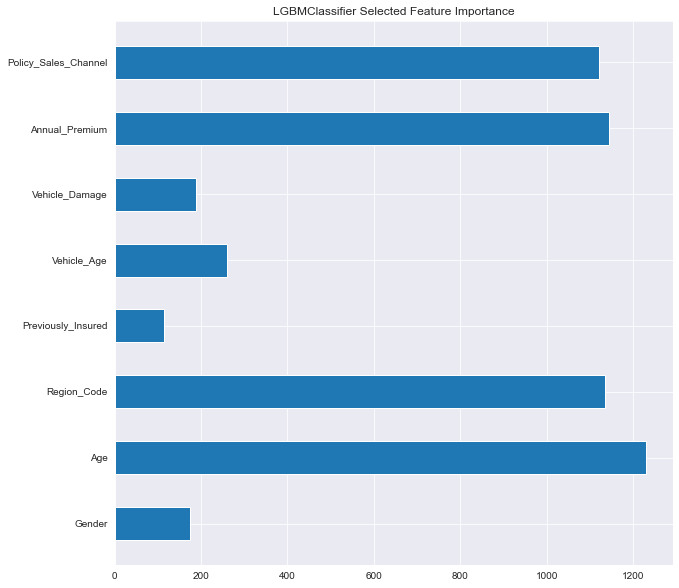

In [16]:
# Check feature importances
fea_ = lgb.feature_importances_
col_=X_train.columns.tolist()
plt.figure(figsize=(10, 10))
plt.barh(col_,fea_,height =0.5)
plt.title("LGBMClassifier Feature Importance")
plt.show()

fea_t = lgb_t.feature_importances_
col_t=X_train_t_dataframe.columns.tolist()
plt.figure(figsize=(10, 10))
plt.barh(col_t,fea_t,height =0.5)
plt.title("LGBMClassifier Selected Feature Importance")
plt.show()

### CatBoostClassifier

CatBoost assigns a taxonomic variable indicator to achieve a result in the form of a singularheat encoding (singularheat maxima: the use of singularheat encoding for different numbers less than or equal to a given parameter value on all features). First, calculate the statistics for some data. Calculate the frequency of a category, add superparameters, and generate new numerical features. This strategy requires that the same label data should not be grouped (i.e., all first and all later), and the data set should be shuffled before training. CatBoost uses different prepositions of the data and different combinations of categorical features. When the number of categorical features to be combined increases, CatBoost considers only a part of the arrangement [16].

‘Learning_rate’ values learning efficiency. ‘Depth’ refers to the depth of the tree. ‘L2_leaf_reg’ is the L2 regularization coefficient and ‘n_estimators’ is the maximum number of trees. Set 'plot' is True to show the train process. 

In [68]:
# Tuing
# set base model
cat = CatBoostClassifier(random_state=42)
param ={'depth': [4, 6, 10],
              'learning_rate': [0.05, 0.1, 0.2],
              'l2_leaf_reg': [1,4,9],
              'iterations': [100,500,1000]
}
# randm accept 10 features
randm = RandomizedSearchCV(cat, param_distributions = param, cv=3, refit = True, n_iter = 10, n_jobs=-1, verbose=100)
randm.fit(X_train, y_train)

# randm_t accept 8 features
randm_t = RandomizedSearchCV(cat, param_distributions = param, cv=3, refit = True, n_iter = 10, n_jobs=-1, verbose=100)
randm_t.fit(X_train_t, y_train)

print("\n The best parameters across all searched params:\n", randm.best_params_)
print("\n The best parameters for selected across all searched params:\n", randm_t.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.

120:	learn: 0.2656170	total: 5.66s	remaining: 17.7s
121:	learn: 0.2655983	total: 5.71s	remaining: 17.7s
122:	learn: 0.2655695	total: 5.75s	remaining: 17.6s
123:	learn: 0.2655342	total: 5.8s	remaining: 17.6s
124:	learn: 0.2655099	total: 5.85s	remaining: 17.5s
125:	learn: 0.2654871	total: 5.89s	remaining: 17.5s
126:	learn: 0.2654588	total: 5.94s	remaining: 17.4s
127:	learn: 0.2654387	total: 5.98s	remaining: 17.4s
128:	learn: 0.2654080	total: 6.03s	remaining: 17.3s
129:	learn: 0.2653804	total: 6.08s	remaining: 17.3s
130:	learn: 0.2653616	total: 6.12s	remaining: 17.2s
131:	learn: 0.2653431	total: 6.16s	remaining: 17.2s
132:	learn: 0.2653335	total: 6.21s	remaining: 17.1s
133:	learn: 0.2653128	total: 6.26s	remaining: 17.1s
134:	learn: 0.2652970	total: 6.3s	remaining: 17s
135:	learn: 0.2652754	total: 6.34s	remaining: 17s
136:	learn: 0.2652442	total: 6.39s	remaining: 16.9s
137:	learn: 0.2652231	total: 6.43s	remaining: 16.9s
138:	learn: 0.2652105	total: 6.48s	remaining: 16.8s
139:	learn: 0.2651

281:	learn: 0.2633957	total: 13s	remaining: 10s
282:	learn: 0.2633842	total: 13s	remaining: 9.99s
283:	learn: 0.2633746	total: 13.1s	remaining: 9.95s
284:	learn: 0.2633626	total: 13.1s	remaining: 9.9s
285:	learn: 0.2633509	total: 13.2s	remaining: 9.85s
286:	learn: 0.2633415	total: 13.2s	remaining: 9.81s
287:	learn: 0.2633312	total: 13.3s	remaining: 9.76s
288:	learn: 0.2633134	total: 13.3s	remaining: 9.72s
289:	learn: 0.2633100	total: 13.3s	remaining: 9.66s
290:	learn: 0.2632995	total: 13.4s	remaining: 9.62s
291:	learn: 0.2632899	total: 13.4s	remaining: 9.57s
292:	learn: 0.2632774	total: 13.5s	remaining: 9.53s
293:	learn: 0.2632615	total: 13.5s	remaining: 9.48s
294:	learn: 0.2632478	total: 13.6s	remaining: 9.43s
295:	learn: 0.2632349	total: 13.6s	remaining: 9.39s
296:	learn: 0.2632207	total: 13.7s	remaining: 9.34s
297:	learn: 0.2632117	total: 13.7s	remaining: 9.29s
298:	learn: 0.2632087	total: 13.8s	remaining: 9.24s
299:	learn: 0.2631963	total: 13.8s	remaining: 9.2s
300:	learn: 0.263182

443:	learn: 0.2618436	total: 20.5s	remaining: 2.58s
444:	learn: 0.2618354	total: 20.5s	remaining: 2.54s
445:	learn: 0.2618275	total: 20.6s	remaining: 2.49s
446:	learn: 0.2618176	total: 20.6s	remaining: 2.44s
447:	learn: 0.2618106	total: 20.6s	remaining: 2.4s
448:	learn: 0.2618048	total: 20.7s	remaining: 2.35s
449:	learn: 0.2617991	total: 20.7s	remaining: 2.3s
450:	learn: 0.2617890	total: 20.8s	remaining: 2.26s
451:	learn: 0.2617840	total: 20.8s	remaining: 2.21s
452:	learn: 0.2617749	total: 20.9s	remaining: 2.17s
453:	learn: 0.2617678	total: 20.9s	remaining: 2.12s
454:	learn: 0.2617591	total: 21s	remaining: 2.07s
455:	learn: 0.2617512	total: 21s	remaining: 2.03s
456:	learn: 0.2617436	total: 21.1s	remaining: 1.98s
457:	learn: 0.2617355	total: 21.1s	remaining: 1.93s
458:	learn: 0.2617302	total: 21.1s	remaining: 1.89s
459:	learn: 0.2617232	total: 21.2s	remaining: 1.84s
460:	learn: 0.2617173	total: 21.2s	remaining: 1.8s
461:	learn: 0.2617075	total: 21.3s	remaining: 1.75s
462:	learn: 0.26170

66:	learn: 0.2643916	total: 1.96s	remaining: 966ms
67:	learn: 0.2643366	total: 2s	remaining: 939ms
68:	learn: 0.2643136	total: 2.03s	remaining: 911ms
69:	learn: 0.2642832	total: 2.06s	remaining: 882ms
70:	learn: 0.2642371	total: 2.09s	remaining: 855ms
71:	learn: 0.2642100	total: 2.12s	remaining: 826ms
72:	learn: 0.2641711	total: 2.16s	remaining: 799ms
73:	learn: 0.2641415	total: 2.2s	remaining: 773ms
74:	learn: 0.2641053	total: 2.23s	remaining: 743ms
75:	learn: 0.2640731	total: 2.26s	remaining: 714ms
76:	learn: 0.2640417	total: 2.29s	remaining: 683ms
77:	learn: 0.2640034	total: 2.31s	remaining: 652ms
78:	learn: 0.2639509	total: 2.34s	remaining: 623ms
79:	learn: 0.2639136	total: 2.37s	remaining: 593ms
80:	learn: 0.2638940	total: 2.4s	remaining: 562ms
81:	learn: 0.2638342	total: 2.42s	remaining: 532ms
82:	learn: 0.2638227	total: 2.45s	remaining: 501ms
83:	learn: 0.2637892	total: 2.47s	remaining: 471ms
84:	learn: 0.2637601	total: 2.5s	remaining: 441ms
85:	learn: 0.2637311	total: 2.53s	rem

In [17]:
# cat accept 10 features
cat = CatBoostClassifier(random_state=42,use_best_model=True, loss_function="Logloss",learning_rate=0.05, l2_leaf_reg=9, iterations=500, depth=6, eval_metric='AUC')
cat = cat.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=10, verbose=100,plot=True)

# cat_t accept 8 features
cat_t = CatBoostClassifier(random_state=42,use_best_model=True, loss_function="Logloss",learning_rate=0.2, l2_leaf_reg=4, iterations=500, depth=6, eval_metric='AUC')
X_train_t_dataframe=X_train[['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel']]
cat_t = cat_t.fit(X_train_t_dataframe, y_train, eval_set=(X_valid[selected_columns], y_valid), early_stopping_rounds=10, verbose=100,plot=True)

pred_proba = cat.predict_proba(X_valid)[:, 1]
pred_proba_t = cat_t.predict_proba(X_valid[selected_columns])[:, 1]

print('CatBoost ROC AUC SCORE: {}'.format(roc_auc_score(y_valid, pred_proba)))
print('CatBoost using feature selection ROC AUC SCORE: {}'.format(roc_auc_score(y_valid, pred_proba_t)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8378127	best: 0.8378127 (0)	total: 130ms	remaining: 1m 4s
100:	test: 0.8554857	best: 0.8554857 (100)	total: 7.07s	remaining: 27.9s
200:	test: 0.8570537	best: 0.8570537 (200)	total: 14.3s	remaining: 21.2s
300:	test: 0.8577452	best: 0.8577452 (300)	total: 21s	remaining: 13.9s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.8579693137
bestIteration = 364

Shrink model to first 365 iterations.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8341644	best: 0.8341644 (0)	total: 67.4ms	remaining: 33.6s
100:	test: 0.8582219	best: 0.8582219 (100)	total: 6.01s	remaining: 23.7s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.858489537
bestIteration = 129

Shrink model to first 130 iterations.
CatBoost ROC AUC SCORE: 0.8579693137466189
CatBoost using feature selection ROC AUC SCORE: 0.8584895370266423


Text(34.0, 0.5, 'True labels')

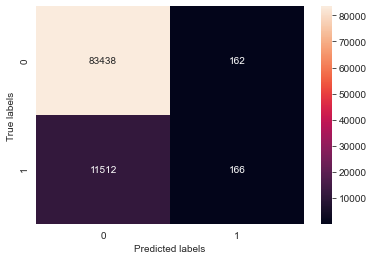

In [18]:
# confusion matrix
preds = cat_t.predict(X_valid[selected_columns])

cm = confusion_matrix(y_valid, preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

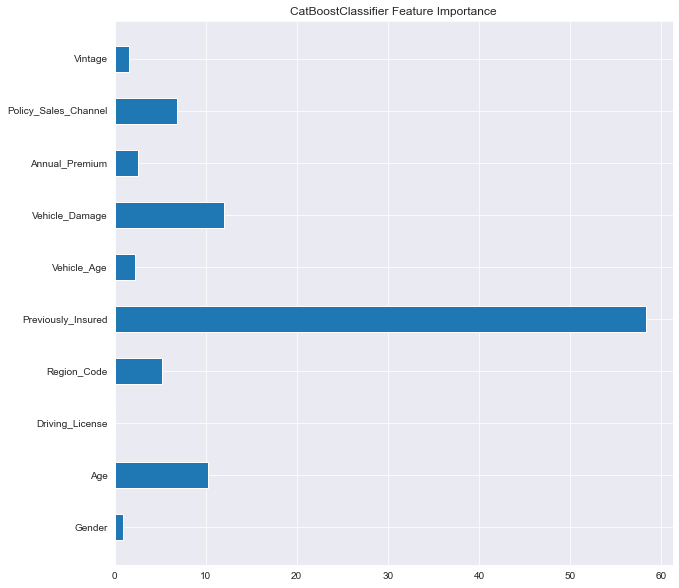

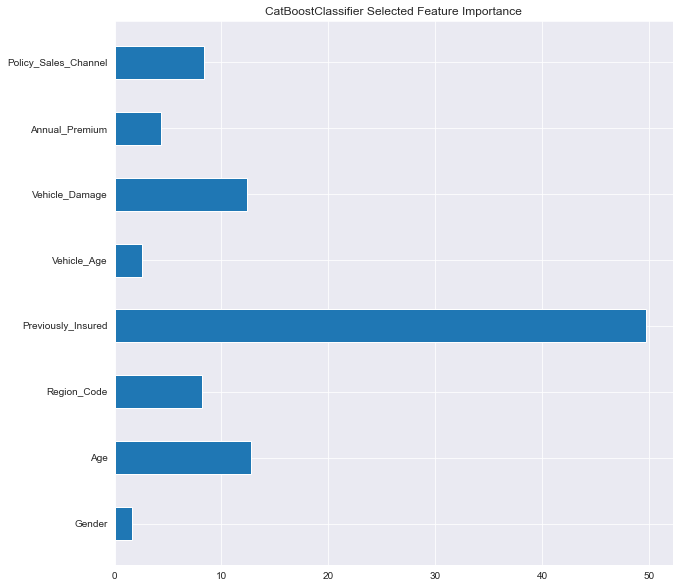

In [19]:
# Check feature importances
fea_ = cat.feature_importances_
fea_name = cat.feature_names_
plt.figure(figsize=(10, 10))
plt.barh(fea_name,fea_,height =0.5)
plt.title("CatBoostClassifier Feature Importance")
plt.show()

fea_t = cat_t.feature_importances_
fea_name_t = cat_t.feature_names_
plt.figure(figsize=(10, 10))
plt.barh(fea_name_t,fea_t,height =0.5)
plt.title("CatBoostClassifier Selected Feature Importance")
plt.show()

### DNN

DNN (Deep Neural Networks) extends the perceptron model. Perceptron model, which is a model with several inputs and one output, is shown in the figure below.
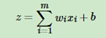

A linear relationship is learned between the output and the input, resulting in an intermediate output.
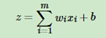

And then there's a neuronal activation function.
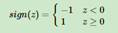

DNN adds a hidden layer, which can have multiple layers to enhance the expression ability of the model.
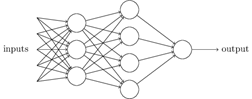

The output layer of neurons can also have more than one output so that the model can be flexibly applied to categorization, regression, other dimension reduction and clustering. At the same time, the activation function is extended to enhance the expression ability of a neural network. The activation function of perceptron is Sign (z). In neural networks, activation functions such as Tanx, Softmax, ReLU and Sigmoid are generally used [17]. Sigmoid is the function we used in logistic regression, as shown below.
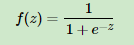
The method I used to build the DNN is provided by TensorFlow. ‘Input_shape’ specifies the number of features passed in. ‘Activation’ specifies activation functions. The ‘optimizer’ specifies the optimizer function, set to 'Adam'. ‘Loss’ specifies the loss function, set to 'binary_crossentropy'. ‘Metrics’ specifies the criteria and sets it to 'binary_accuracy'. Set ‘early_stopping’ to prevent overfitting.

In [10]:
# Tuning
# set base model accept 10 features
def create_model(dropout_ratio):
    model = keras.Sequential([
        layers.BatchNormalization(input_shape=[10]),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_ratio),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_ratio),
        layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(
        optimizer= 'Adam',
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )
    return model

# set base model_t accept 8 features
def create_model_t(dropout_ratio):
    model = keras.Sequential([
        layers.BatchNormalization(input_shape=[8]),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_ratio),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_ratio),
        layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(
        optimizer= 'Adam',
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )
    return model

# kc accept 10 features
kc=KerasClassifier(build_fn=create_model, verbose=100)
# kc_t accept 8 features
kc_t=KerasClassifier(build_fn=create_model_t, verbose=100)

param_grid = {
    'dropout_ratio':[0.1,0.2,0.3],
    'batch_size': [128,256,512],
    'epochs':[10,20,50]
}
# rs_keras accept 10 features
rs_keras = RandomizedSearchCV(kc, param_distributions = param_grid, cv=3,refit = True,n_iter = 10, n_jobs=-1,random_state=42,verbose=100)
rs_keras.fit(X_train, y_train)

# rs_keras_t accept 8 features
rs_keras_t = RandomizedSearchCV(kc_t, param_distributions = param_grid, cv=3,refit = True,n_iter = 10, n_jobs=-1,random_state=42,verbose=100)
rs_keras_t.fit(X_train_t, y_train)

print("\n The best parameters across all searched params:\n", rs_keras.best_params_)
print("\n The best parameters for selected features across all searched params:\n", rs_keras_t.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 14.

Epoch 1/20
1117/1117 [==============================] - 6s 5ms/step - loss: 0.3181 - binary_accuracy: 0.8542 - val_loss: 0.2703 - val_binary_accuracy: 0.8772
Epoch 2/20
1117/1117 [==============================] - 6s 5ms/step - loss: 0.2752 - binary_accuracy: 0.8763 - val_loss: 0.2693 - val_binary_accuracy: 0.8774
Epoch 3/20
1117/1117 [==============================] - 5s 5ms/step - loss: 0.2721 - binary_accuracy: 0.8771 - val_loss: 0.2694 - val_binary_accuracy: 0.8774
Epoch 4/20
1117/1117 [==============================] - 6s 5ms/step - loss: 0.2712 - binary_accuracy: 0.8772 - val_loss: 0.2684 - val_binary_accuracy: 0.8774
Epoch 5/20
1117/1117 [==============================] - 6s 5ms/step - loss: 0.2708 - binary_accuracy: 0.8774 - val_loss: 0.2680 - val_binary_accuracy: 0.8775
Epoch 6/20
1117/1117 [==============================] - 6s 5ms/step - loss: 0.2703 - binary_accuracy: 0.8774 - val_loss: 0.2680 - val_binary_accuracy: 0.8774
Epoch 7/20
1117/1117 [==============================

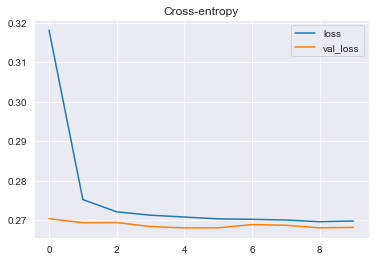

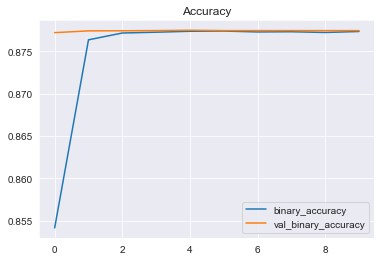

Best Validation Loss: 0.2680
Best Validation Accuracy: 0.8775


In [10]:
# model accept 10 features
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[10]),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
# get model imformation
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=20,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
plt.show()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
plt.show()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

Epoch 1/10
1117/1117 [==============================] - 6s 6ms/step - loss: 0.3048 - binary_accuracy: 0.8598 - val_loss: 0.2721 - val_binary_accuracy: 0.8771
Epoch 2/10
1117/1117 [==============================] - 6s 6ms/step - loss: 0.2742 - binary_accuracy: 0.8760 - val_loss: 0.2689 - val_binary_accuracy: 0.8774
Epoch 3/10
1117/1117 [==============================] - 6s 5ms/step - loss: 0.2714 - binary_accuracy: 0.8769 - val_loss: 0.2691 - val_binary_accuracy: 0.8774
Epoch 4/10
1117/1117 [==============================] - 6s 5ms/step - loss: 0.2706 - binary_accuracy: 0.8774 - val_loss: 0.2685 - val_binary_accuracy: 0.8774
Epoch 5/10
1117/1117 [==============================] - 6s 6ms/step - loss: 0.2701 - binary_accuracy: 0.8773 - val_loss: 0.2682 - val_binary_accuracy: 0.8775
Epoch 6/10
1117/1117 [==============================] - 6s 5ms/step - loss: 0.2698 - binary_accuracy: 0.8773 - val_loss: 0.2679 - val_binary_accuracy: 0.8774
Epoch 7/10
1117/1117 [==============================

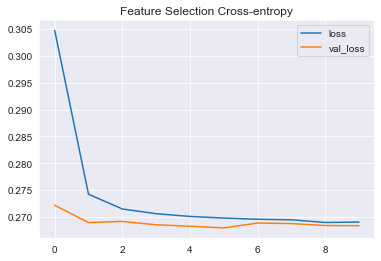

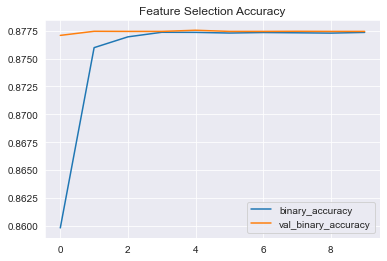

Best Feature Selection Validation Loss: 0.2679
Best Feature Selection Validation Accuracy: 0.8775


In [23]:
# model_t accept 8 features
model_t = keras.Sequential([
    layers.BatchNormalization(input_shape=[8]),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid'),
])
model_t.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
# get model information
history_t = model_t.fit(
    X_train_t, y_train,
    validation_data=(X_valid[selected_columns], y_valid),
    batch_size=256,
    epochs=10,
    callbacks=[early_stopping],
)

history_df_t = pd.DataFrame(history_t.history)
history_df_t.loc[:, ['loss', 'val_loss']].plot(title="Feature Selection Cross-entropy")
plt.show()
history_df_t.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Feature Selection Accuracy")
plt.show()
print(("Best Feature Selection Validation Loss: {:0.4f}" +\
      "\nBest Feature Selection Validation Accuracy: {:0.4f}")\
      .format(history_df_t['val_loss'].min(),
              history_df_t['val_binary_accuracy'].max()))

Text(34.0, 0.5, 'True labels')

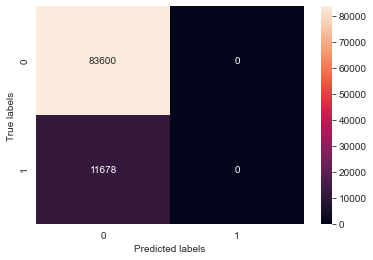

In [40]:
# confusion matrix
preds = model_t.predict(X_valid[selected_columns]).astype(int)

cm = confusion_matrix(y_valid, preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

## Results Comparision

Validation score of the LogisticRegression with 10 features is 0.8218471939630483. After feature selection to select 8 features, the score is 0.8218543732499912.<br />
Validation score of the DecisionTreeClassifier with 10 features is 0.8497230699405335. After feature selection to select 8 features, the score is 0.8496354988236992.<br />
Validation score of the RandomForestClassifier with 10 features is 0.8549613912308837. After feature selection to select 8 features, the score is 0.8542144017376968.<br />
Validation score of the XGBClassifier with 10 features is 0.8573571829948925. After feature selection to select 8 features, the score is 0.8577675869483452.<br />
Validation score of the LGBMClassifier with 10 features is 0.8582664557164291. After feature selection to select 8 features, the score is .8586276125680234.<br />
Validation score of the CatBoostClassifier with 10 features is 0.8579693137466189. After feature selection to select 8 features, the score is 0.8584895370266423.<br />
Validation score of the DNN with 10 features is 0.8775. After feature selection to select 8 features, the score is 0.8775.<br />
I used AUC (Area Under Curve) metric and found that DNN is the best model, which is 0.8775.and use Feature Selection (selectKBest) will have better results.<br />
In my opinion, the seven models are all successful. They have not been over-fitted, because they are all prevented from over-fitting through various parameter settings and their validation scores are all above 0.8.<br />
The comparison results between models show below.

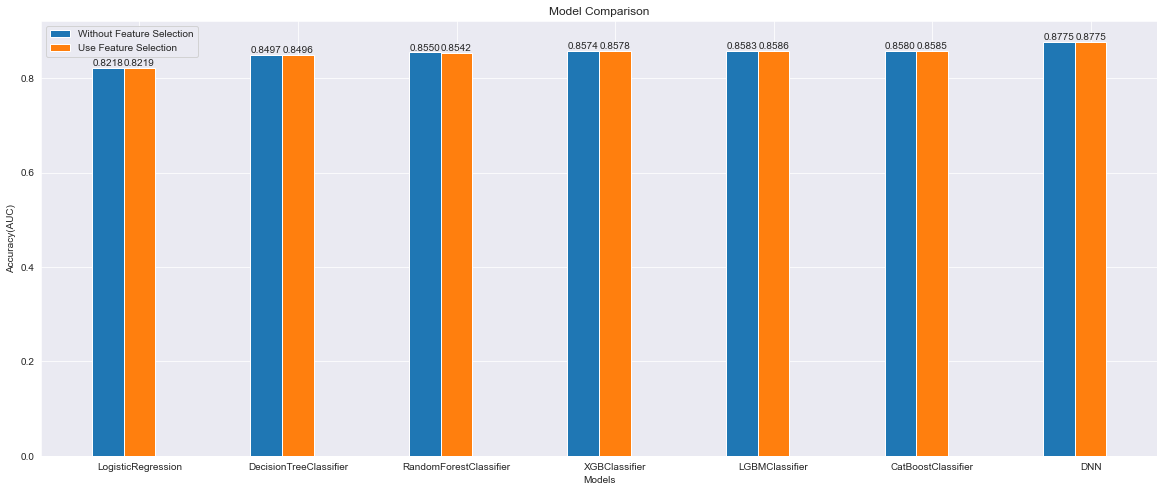

In [28]:
models = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier', 'DNN']
results=[0.8218471939630483,0.8497230699405335,0.8549613912308837,0.8573571829948925,0.8582664557164291,0.8579693137466189,0.8775]
feature_selection_results=[0.8218543732499912,0.8496354988236992,0.8542144017376968,0.8577675869483452,0.8586276125680234,0.8584895370266423,0.8775]

x = list(range(len(models)))
x_1 = [i+0.2 for i in x]

plt.figure(figsize = (20,8))
plt.title("Model Comparison")
plt.xlabel('Models')
plt.ylabel('Accuracy(AUC)')
b1=plt.bar(range(len(models)),results,width=0.2,label="Without Feature Selection")
b2=plt.bar(x_1,feature_selection_results, width=0.2,label="Use Feature Selection")
for b in b1+b2:
    h=b.get_height()
    plt.text(b.get_x()+b.get_width()/2,h,'%.04f' %h,ha='center',va='bottom')
plt.xticks(x_1,models)
plt.legend()
plt.show()

## Blending

Finally, I composed a hybrid model of RandomForestClassifier, XGBClassifier, LGBMClassifier, CatboostClassifier and DNN. Because it improves the accuracy of the prediction. I didn't use LogisticRegression because it doesn't perform well. I didn't use DecisionTreeClassifier because I already used RandomForestClassifier which is based on the decision tree algorithm. I assigned a weight to each model according to how good or bad it is. DNN performs best and therefore has the largest proportion in the hybrid model.<br />
Submit the results predicted using the Hybrid Model to Kaggle, where I got the data set. The address is https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction.

In [20]:
#extract only the probabilities of response = 1 
pred_RandomForestClassifier = rfc_t.predict_proba(test[selected_columns])[:,1] 
pred_XGBClassifier = xgboost_t.predict_proba(test[selected_columns])[:,1] 
pred_LGBMClassifier = lgb_t.predict_proba(test[selected_columns])[:,1] 
pred_CatBoostClassifier = cat_t.predict_proba(test[selected_columns])[:,1] 
pred_DNN = model_t.predict_proba(test[selected_columns])[:,0] 

w1 = 0.1                   
w2 = 0.15                 
w3 = 0.15
w4 = 0.15
w5 = 0.45

# Blending using average performed good for my model
final = (1/5)*((w1*pred_RandomForestClassifier) + (w2*pred_XGBClassifier) + (w3*pred_LGBMClassifier) + (w4*pred_CatBoostClassifier) + (w5*pred_DNN))        
test_temp = pd.read_csv('test.csv')
submit = pd.DataFrame({'id': test_temp.id, 'Response': final})
# save the csv file and upload it to Kaggle
submit.to_csv('blend_results.csv', index=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=4)]: Done 170 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 171 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 172 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 174 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 175 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 177 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 178 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 179 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 180 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 181 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 182 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 183 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 185 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 319 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 320 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 321 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 322 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 323 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 324 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 325 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 326 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 327 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 328 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 329 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 330 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 331 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 332 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 333 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 334 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 464 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 465 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 466 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 467 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 468 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 469 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 470 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 471 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 472 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 473 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 474 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 475 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 476 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 477 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 478 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 479 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Do

# 6.Conclusion and Future Works
The problem is to help companies build models to predict whether last year's policyholders (customers) will also be interested in the vehicle insurance offered by the company. The input to my predictor is CSV format data. I did the data exploration first by drawing Distribution, Countplot, Boxplot and Correlation Matrix. I did the feature engineering by StandardScaler, MinMaxScaler and LabelEncoder and feature selection by SelectKBest. I then established LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier and DNN 7 machine learning models and used RandomizedSearchCV to turn the hyperparameters. I used the 7 models to output the probability of whether a customer will buy the insurance. Finally, I compared the results between the models by AUC (Area Under Curve) metric found that the best model is DNN with a validation score of 0.8775, and blended the RandomForestClassifier, XGBClassifier, LGBMClassifier, CatBoostClassifier and DNN to one hybrid model for better performance.<br />
I think RandomForestClassifier, XGBClassifier, LGBMClassifier and CatboostClassifier perform better because they are more complex models with more parameters to use compared to the LogisticRegression. DNN works well because it has a deep network and can adapt itself better.

Although the results suggesting that the problem is solved satisfactorily, some places can be improved in the future. If I had had more time or more computational resources, I would have chosen more parameter candidates in the hyperparameter tuning stage to better optimize the model. Besides, I will use more deep learning techniques to optimize my DNN model, such as selecting more diverse activation functions and trying deeper networks.

# 7.Bibliography
[1] [online] Available: https://www.kaggle.com/anmolkumar/vehicle-insurance-eda-lgbm-vs-catboost-85-83#Feature-Engineering.<br />
[2] [online] Available: https://www.kaggle.com/roshankumarg/rank-10-solution-cross-sell-prediction-hackathon#Problem-statement-.<br />
[3] [online] Available: https://www.kaggle.com/isaienkov/insurance-prediction-eda-and-modeling-acc-88.<br />
[4] [online] Available: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction.<br />
[5]	E. Bisong, "Introduction to Scikit-learn," in Building Machine Learning and Deep Learning Models on Google Cloud Platform: Springer, 2019, pp. 215-229.<br />
[6]	A. Jović, K. Brkić, and N. Bogunović, "A review of feature selection methods with applications," in 2015 38th international convention on information and communication technology, electronics and microelectronics (MIPRO), 2015, pp. 1200-1205: Ieee.<br />
[7]	F. Pedregosa et al., "Scikit-learn: Machine Learning in Python," journal of machine learning research, vol. 12, no. 85, pp. 2825-2830, 2/1/2011 2011.<br />
[8]	T. Agrawal, "Hyperparameter Optimization Using Scikit-Learn," in Hyperparameter Optimization in Machine Learning: Springer, 2021, pp. 31-51.<br />
[9]	G. Gasso, "Logistic regression," 2019.<br />
[10]	A. J. Myles, R. N. Feudale, Y. Liu, N. A. Woody, and S. D. J. J. o. C. A. J. o. t. C. S. Brown, "An introduction to decision tree modeling," vol. 18, no. 6, pp. 275-285, 2004.<br />
[11]	R. E. Schapire, "A brief introduction to boosting," in Ijcai, 1999, vol. 99, pp. 1401-1406.<br />
[12]	W. Wang, T. Li, W. Wang, and Z. J. I. A. Tu, "Multiple Fingerprints-Based Indoor Localization via GBDT: Subspace and RSSI," vol. 7, pp. 80519-80529, 2019.<br />
[13]	G. Biau and E. J. T. Scornet, "A random forest guided tour," vol. 25, no. 2, pp. 197-227, 2016.<br />
[14]	T. Chen, T. He, M. Benesty, V. Khotilovich, and Y. J. R. p. v.-. Tang, "Xgboost: extreme gradient boosting," pp. 1-4, 2015.<br />
[15]	G. Ke et al., "Lightgbm: A highly efficient gradient boosting decision tree," in Advances in neural information processing systems, 2017, pp. 3146-3154.<br />
[16]	L. Prokhorenkova, G. Gusev, A. Vorobev, A. V. Dorogush, and A. Gulin, "CatBoost: unbiased boosting with categorical features," in Advances in neural information processing systems, 2018, pp. 6638-6648.<br />
[17]	A. L. Caterini and D. E. Chang, Deep Neural Networks in a Mathematical Framework. Springer, 2018.<br />
The libraries I use: scikit-learn and TensorFlow. 